KELOMPOK A1 DBSCAN on Penyakit Ginjal

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Database/kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


PRE PROCESSING

MENULIS ULANG PENAMAAN HEADER

In [5]:
df = df.rename(columns={
    "age":"Umur",
    "bp":"BloodPressure",
    "sg":"SpecificGravity",
    "al":"Albumin",
    "su":"Sugar",
    "rbc":"RedBloodCells",
    "pc":"PusCell",
    "pcc":"PusCellclumps",
    "ba":"Bacteria",
    "bgr":"BloodGlucose",
    "bu":"BloodUrea",
    "sc":"SerumCreatinine",
    "sod":"Sodium",
    "pot":"Potassium",
    "hemo":"Hemoglobin",
    "pcv":"CellVolume",
    "wc":"WhiteCell",
    "rc":"RedCell",
    "htn":"Hypertension",
    "dm":"DiabetesMellitus",
    "cad":"ArteryDisease",
    "appet":"Appetite",
    "pe":"PedalEdema",
    "ane":"Anemia"
  })
df

,id,Umur,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellclumps,Bacteria,...,CellVolume,WhiteCell,RedCell,Hypertension,DiabetesMellitus,ArteryDisease,Appetite,PedalEdema,Anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


Mengecek Informasi Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                400 non-null    int64  
 1   Umur              391 non-null    float64
 2   BloodPressure     388 non-null    float64
 3   SpecificGravity   353 non-null    float64
 4   Albumin           354 non-null    float64
 5   Sugar             351 non-null    float64
 6   RedBloodCells     248 non-null    object 
 7   PusCell           335 non-null    object 
 8   PusCellclumps     396 non-null    object 
 9   Bacteria          396 non-null    object 
 10  BloodGlucose      356 non-null    float64
 11  BloodUrea         381 non-null    float64
 12  SerumCreatinine   383 non-null    float64
 13  Sodium            313 non-null    float64
 14  Potassium         312 non-null    float64
 15  Hemoglobin        348 non-null    float64
 16  CellVolume        330 non-null    object 
 1

Cek Data Pada Kolom Kategorik

In [7]:
jenis_data1 = df['Anemia'].unique()
jenis_data2 = df['PedalEdema'].unique()
jenis_data3 = df['Appetite'].unique()
jenis_data4 = df['ArteryDisease'].unique()
jenis_data5 = df['DiabetesMellitus'].unique()
jenis_data6 = df['Hypertension'].unique()
jenis_data7 = df['RedCell'].unique()
jenis_data8 = df['WhiteCell'].unique()
jenis_data9 = df['CellVolume'].unique()
jenis_data10 = df['Bacteria'].unique()
jenis_data11 = df['PusCellclumps'].unique()
jenis_data12 = df['PusCell'].unique()
jenis_data13 = df['RedBloodCells'].unique()
print(f"Anemia = {jenis_data1}\n");print(f"PedalEdema = {jenis_data2}\n");print(f"Appetite = {jenis_data3}\n");print(f"ArteryDisease = {jenis_data4}\n");print(f"DiabetesMellitus = {jenis_data5}\n")
print(f"Hypertension = {jenis_data6}\n");print(f"RedCell = {jenis_data7}\n");print(f"WhiteCell = {jenis_data8}\n");print(f"CellVolume = {jenis_data9}\n");print(f"Bacteria = {jenis_data10}\n")
print(f"PusCellclumps = {jenis_data11}\n");print(f"PusCell = {jenis_data12}\n");print(f"RedBloodCells = {jenis_data13}\n")

Anemia = ['no' 'yes' nan]

PedalEdema = ['no' 'yes' nan]

Appetite = ['good' 'poor' nan]

ArteryDisease = ['no' 'yes' '\tno' nan]

DiabetesMellitus = ['yes' 'no' ' yes' '\tno' '\tyes' nan]

Hypertension = ['yes' 'no' nan]

RedCell = ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']

WhiteCell = ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500

Melakukan ENCODING pada data kategorik

In [8]:
# Encoding || yang tidak bisa di encode: CellVolume, WhiteCell, RedCell
df = df.replace({
    "Anemia":{
        "no":0,
        "yes":1
        },
    "PedalEdema":{
        "no":0,
        "yes":1
        },
    "Appetite":{
        "poor":0,
        "good":1
        },
    "ArteryDisease":{
        "no":0,
        "\tno":0,
        "yes":1
        },
    "DiabetesMellitus":{
        "no":0,
        "\tno":0,
        "yes":1,
        " yes":1,
        "\tyes":1,
        },
    "Hypertension":{
        "no":0,
        "yes":1
        },
    "Bacteria":{
        "notpresent":0,
        "present":1
        },
    "PusCellclumps":{
        "notpresent":0,
        "present":1
        },
    "PusCell":{
        "abnormal":0,
        "normal":1
        },
    "RedBloodCells":{
        "abnormal":0,
        "normal":1
        },
      })

In [9]:
jenis_data1 = df['Anemia'].unique()
jenis_data2 = df['PedalEdema'].unique()
jenis_data3 = df['Appetite'].unique()
jenis_data4 = df['ArteryDisease'].unique()
jenis_data5 = df['DiabetesMellitus'].unique()
jenis_data6 = df['Hypertension'].unique()
jenis_data7 = df['RedCell'].unique()
jenis_data8 = df['WhiteCell'].unique()
jenis_data9 = df['CellVolume'].unique()
jenis_data10 = df['Bacteria'].unique()
jenis_data11 = df['PusCellclumps'].unique()
jenis_data12 = df['PusCell'].unique()
jenis_data13 = df['RedBloodCells'].unique()
print(f"Anemia = {jenis_data1}\n");print(f"PedalEdema = {jenis_data2}\n");print(f"Appetite = {jenis_data3}\n");print(f"ArteryDisease = {jenis_data4}\n");print(f"DiabetesMellitus = {jenis_data5}\n")
print(f"Hypertension = {jenis_data6}\n");print(f"RedCell = {jenis_data7}\n");print(f"WhiteCell = {jenis_data8}\n");print(f"CellVolume = {jenis_data9}\n");print(f"Bacteria = {jenis_data10}\n")
print(f"PusCellclumps = {jenis_data11}\n");print(f"PusCell = {jenis_data12}\n");print(f"RedBloodCells = {jenis_data13}\n")

Anemia = [ 0.  1. nan]

PedalEdema = [ 0.  1. nan]

Appetite = [ 1.  0. nan]

ArteryDisease = [ 0.  1. nan]

DiabetesMellitus = [ 1.  0. nan]

Hypertension = [ 1.  0. nan]

RedCell = ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']

WhiteCell = ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '128

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                400 non-null    int64  
 1   Umur              391 non-null    float64
 2   BloodPressure     388 non-null    float64
 3   SpecificGravity   353 non-null    float64
 4   Albumin           354 non-null    float64
 5   Sugar             351 non-null    float64
 6   RedBloodCells     248 non-null    float64
 7   PusCell           335 non-null    float64
 8   PusCellclumps     396 non-null    float64
 9   Bacteria          396 non-null    float64
 10  BloodGlucose      356 non-null    float64
 11  BloodUrea         381 non-null    float64
 12  SerumCreatinine   383 non-null    float64
 13  Sodium            313 non-null    float64
 14  Potassium         312 non-null    float64
 15  Hemoglobin        348 non-null    float64
 16  CellVolume        330 non-null    object 
 1

DROP ATRIBUT TIDAK DIBUTUHKAN

In [ ]:
# df = df.drop(["id", "RedBloodCells", "PusCell", "PusCellclumps", "Bacteria", "CellVolume", "WhiteCell", "RedCell", "Hypertension", "DiabetesMellitus", "ArteryDisease", "Appetite", "PedalEdema", "Anemia", "classification"], axis=1)
df = df.drop(["id", "CellVolume", "WhiteCell", "RedCell", "classification"], axis=1)
df.head()

,Umur,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellclumps,Bacteria,BloodGlucose,...,SerumCreatinine,Sodium,Potassium,Hemoglobin,Hypertension,DiabetesMellitus,ArteryDisease,Appetite,PedalEdema,Anemia
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,1.2,NaN,NaN,15.4,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,0.8,NaN,NaN,11.3,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,1.8,NaN,NaN,9.6,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,3.8,111.0,2.5,11.2,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,1.4,NaN,NaN,11.6,0.0,0.0,0.0,1.0,0.0,0.0


DUPLIKASI BARIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Umur              391 non-null    float64
 1   BloodPressure     388 non-null    float64
 2   SpecificGravity   353 non-null    float64
 3   Albumin           354 non-null    float64
 4   Sugar             351 non-null    float64
 5   RedBloodCells     248 non-null    float64
 6   PusCell           335 non-null    float64
 7   PusCellclumps     396 non-null    float64
 8   Bacteria          396 non-null    float64
 9   BloodGlucose      356 non-null    float64
 10  BloodUrea         381 non-null    float64
 11  SerumCreatinine   383 non-null    float64
 12  Sodium            313 non-null    float64
 13  Potassium         312 non-null    float64
 14  Hemoglobin        348 non-null    float64
 15  Hypertension      398 non-null    float64
 16  DiabetesMellitus  398 non-null    float64
 1

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [ ]:
# df = df.drop_duplicates()

KONTROL NILAI NULL / NAN

In [ ]:
print(df.isnull().sum())
# print(df.isna().sum())

Umur                  9
BloodPressure        12
SpecificGravity      47
Albumin              46
Sugar                49
RedBloodCells       152
PusCell              65
PusCellclumps         4
Bacteria              4
BloodGlucose         44
BloodUrea            19
SerumCreatinine      17
Sodium               87
Potassium            88
Hemoglobin           52
Hypertension          2
DiabetesMellitus      2
ArteryDisease         2
Appetite              1
PedalEdema            1
Anemia                1
dtype: int64


In [ ]:
for column in df.columns:
  df[column] = df[column].fillna(df[column].mean())

# df.Umur = df.Umur.fillna(df.Umur.mean())
# df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
# df.SpecificGravity = df.SpecificGravity.fillna(df.SpecificGravity.mean())
# df.Albumin = df.Albumin.fillna(df.Albumin.mean())
# df.Sugar = df.Sugar.fillna(df.Sugar.mean())
# df.BloodGlucose = df.BloodGlucose.fillna(df.BloodGlucose.mean())
# df.BloodUrea = df.BloodUrea.fillna(df.BloodUrea.mean())
# df.SerumCreatinine = df.SerumCreatinine.fillna(df.SerumCreatinine.mean())
# df.Sodium = df.Sodium.fillna(df.Sodium.mean())
# df.Potassium = df.Potassium.fillna(df.Potassium.mean())
# df.Hemoglobin = df.Hemoglobin.fillna(df.Hemoglobin.mean())

In [ ]:
print(df.isnull().sum())

Umur                0
BloodPressure       0
SpecificGravity     0
Albumin             0
Sugar               0
RedBloodCells       0
PusCell             0
PusCellclumps       0
Bacteria            0
BloodGlucose        0
BloodUrea           0
SerumCreatinine     0
Sodium              0
Potassium           0
Hemoglobin          0
Hypertension        0
DiabetesMellitus    0
ArteryDisease       0
Appetite            0
PedalEdema          0
Anemia              0
dtype: int64


In [ ]:
df['Umur'] = df['Umur'].round().astype(int)

In [ ]:
df

,Umur,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellclumps,Bacteria,BloodGlucose,...,SerumCreatinine,Sodium,Potassium,Hemoglobin,Hypertension,DiabetesMellitus,ArteryDisease,Appetite,PedalEdema,Anemia
0,48,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,1.2,137.528754,4.627244,15.4,1.0,1.0,0.0,1.0,0.0,0.0
1,7,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,0.8,137.528754,4.627244,11.3,0.0,0.0,0.0,1.0,0.0,0.0
2,62,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,1.8,137.528754,4.627244,9.6,0.0,1.0,0.0,0.0,0.0,1.0
3,48,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,3.8,111.000000,2.500000,11.2,1.0,0.0,0.0,0.0,1.0,1.0
4,51,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,1.4,137.528754,4.627244,11.6,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,140.000000,...,0.5,150.000000,4.900000,15.7,0.0,0.0,0.0,1.0,0.0,0.0
396,42,70.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,75.000000,...,1.2,141.000000,3.500000,16.5,0.0,0.0,0.0,1.0,0.0,0.0
397,12,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,...,0.6,137.000000,4.400000,15.8,0.0,0.0,0.0,1.0,0.0,0.0
398,17,60.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,114.000000,...,1.0,135.000000,4.900000,14.2,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Umur              400 non-null    int64  
 1   BloodPressure     400 non-null    float64
 2   SpecificGravity   400 non-null    float64
 3   Albumin           400 non-null    float64
 4   Sugar             400 non-null    float64
 5   RedBloodCells     400 non-null    float64
 6   PusCell           400 non-null    float64
 7   PusCellclumps     400 non-null    float64
 8   Bacteria          400 non-null    float64
 9   BloodGlucose      400 non-null    float64
 10  BloodUrea         400 non-null    float64
 11  SerumCreatinine   400 non-null    float64
 12  Sodium            400 non-null    float64
 13  Potassium         400 non-null    float64
 14  Hemoglobin        400 non-null    float64
 15  Hypertension      400 non-null    float64
 16  DiabetesMellitus  400 non-null    float64
 1

Melihat KORELASI dengan seaborn

In [ ]:
import matplotlib.pyplot as plt

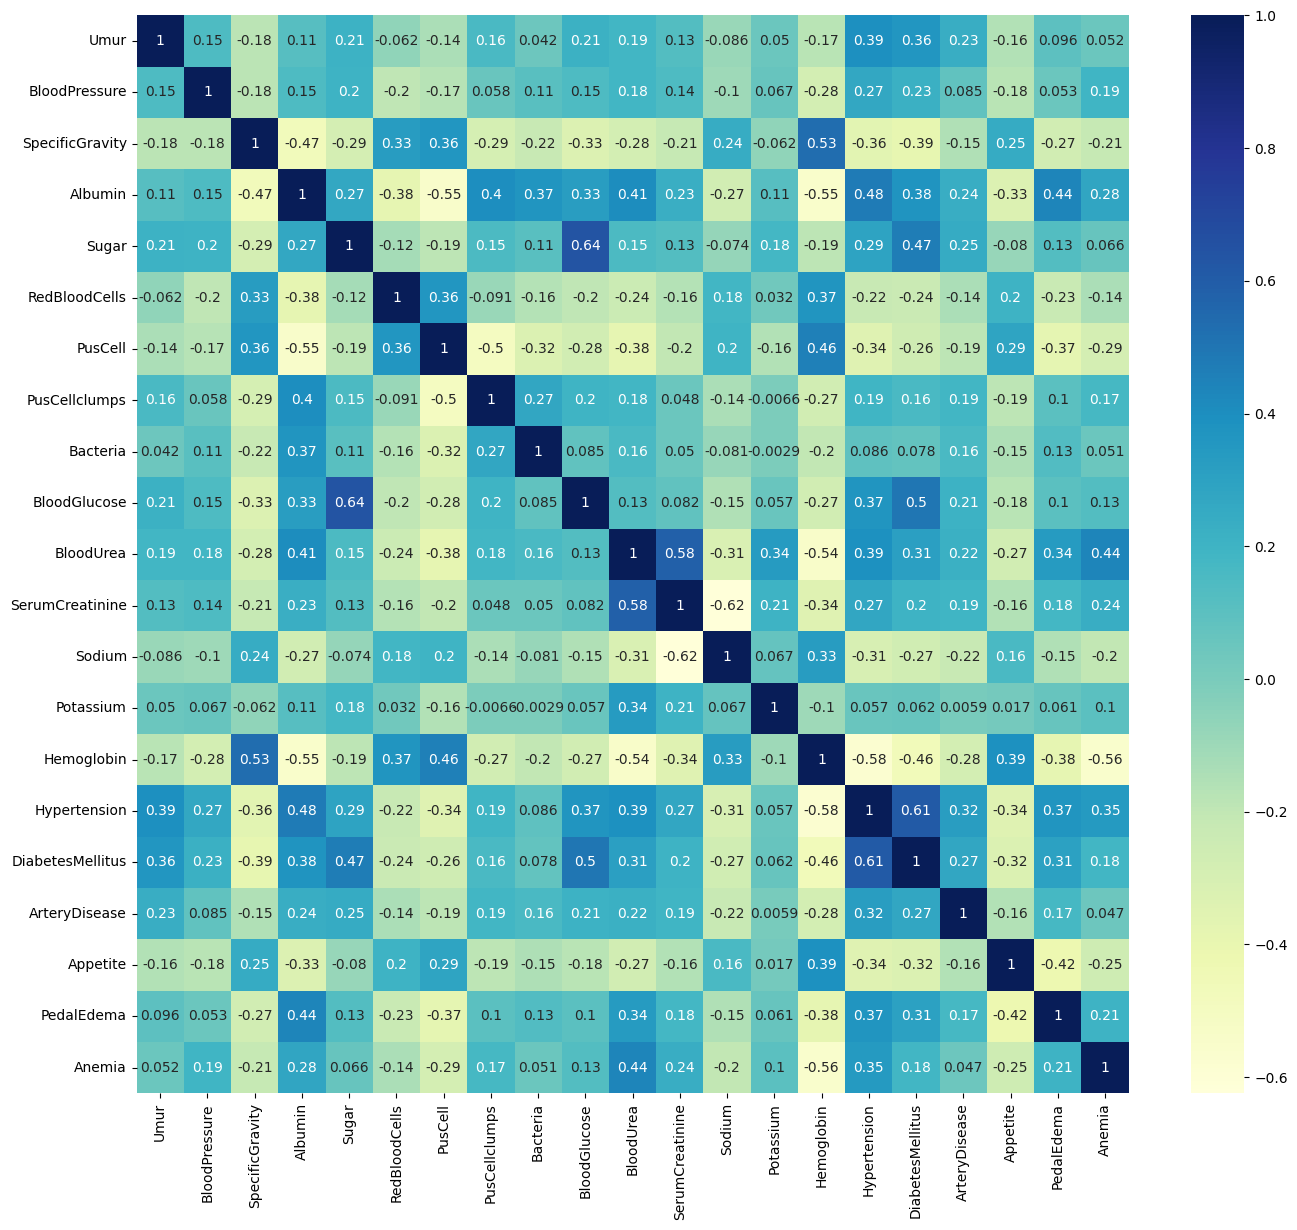

In [ ]:
import seaborn as sns

plt = plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

NORMALISASI
Vbaru = (Vlama - Vmin) / (Vmax - Vmin)

In [ ]:
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

ALGORITHM

VISUALIZE DE DATA W/ SCATER PLUOT

In [ ]:
import matplotlib.pyplot as plt

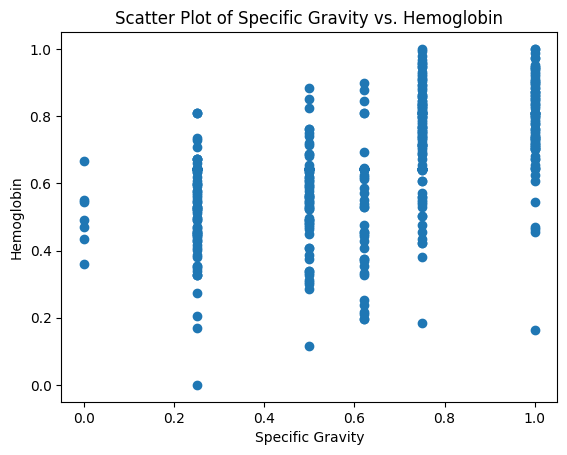

In [ ]:
# 2 dimentional graph data
grav_hemo = df[['SpecificGravity', 'Hemoglobin']]
grav, hemo = df.SpecificGravity, df.Hemoglobin

plt.scatter(grav, hemo)
plt.title("Scatter Plot of Specific Gravity vs. Hemoglobin")
plt.xlabel("Specific Gravity")
plt.ylabel("Hemoglobin")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X = grav_hemo.to_numpy()
X.shape

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=5).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2)

In [ ]:
df['cluster'] = dbscan_cluster_model.labels_
df

,Umur,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellclumps,Bacteria,BloodGlucose,...,Sodium,Potassium,Hemoglobin,Hypertension,DiabetesMellitus,ArteryDisease,Appetite,PedalEdema,Anemia,cluster
0,0.522727,0.230769,0.75,0.2,0.0,0.810484,1.0,0.0,0.0,0.211538,...,0.839298,0.047803,0.836735,1.0,1.0,0.0,1.0,0.0,0.0,0
1,0.056818,0.000000,0.75,0.8,0.0,0.810484,1.0,0.0,0.0,0.269309,...,0.839298,0.047803,0.557823,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.681818,0.230769,0.25,0.4,0.6,1.000000,1.0,0.0,0.0,0.856838,...,0.839298,0.047803,0.442177,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.522727,0.153846,0.00,0.8,0.0,1.000000,0.0,1.0,0.0,0.202991,...,0.671924,0.000000,0.551020,1.0,0.0,0.0,0.0,1.0,1.0,2
4,0.556818,0.230769,0.25,0.4,0.0,1.000000,1.0,0.0,0.0,0.179487,...,0.839298,0.047803,0.578231,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.000000,1.0,0.0,0.0,0.252137,...,0.917981,0.053933,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0
396,0.454545,0.153846,1.00,0.0,0.0,1.000000,1.0,0.0,0.0,0.113248,...,0.861199,0.022472,0.911565,0.0,0.0,0.0,1.0,0.0,0.0,3
397,0.113636,0.230769,0.75,0.0,0.0,1.000000,1.0,0.0,0.0,0.166667,...,0.835962,0.042697,0.863946,0.0,0.0,0.0,1.0,0.0,0.0,0
398,0.170455,0.076923,1.00,0.0,0.0,1.000000,1.0,0.0,0.0,0.196581,...,0.823344,0.053933,0.755102,0.0,0.0,0.0,1.0,0.0,0.0,3


In [ ]:
df['cluster'].value_counts()
#-1 adalah outliers, 1 cluster ke1 dan 0 adalah clluster ke0

 0    228
 1     84
 3     80
 2      7
-1      1
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

fig = px.scatter(x=grav, y=hemo, color=df['cluster'])
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(X, df['cluster'])

0.35847038640782974

DEF FUNCTION

In [ ]:
def scatter(xData, yData):
  xLabel, yLabel = xData, yData

  plt.scatter(xLabel, yLabel)
  plt.title(f"Scatter Plot of {xLabel.name} vs. {yLabel.name}")
  plt.xlabel(f"{xLabel.name}")
  plt.ylabel(f"{yLabel.name}")
  plt.show()

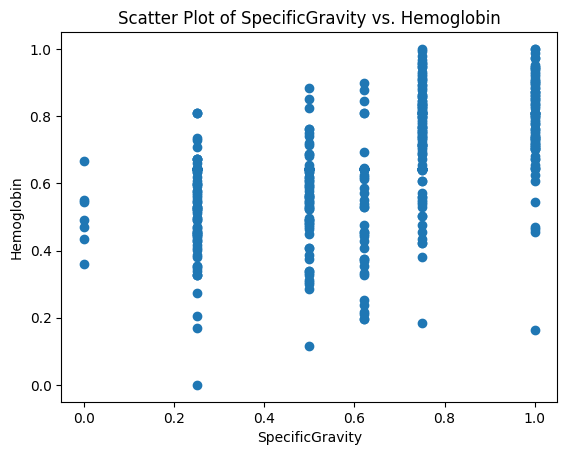

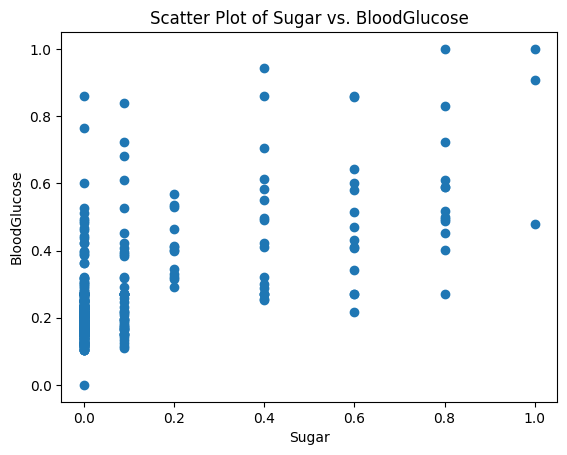

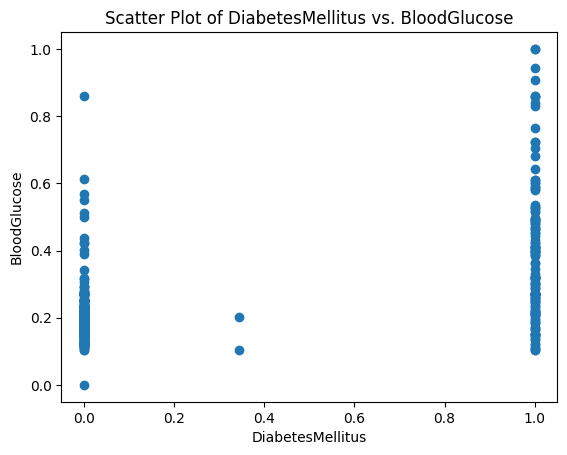

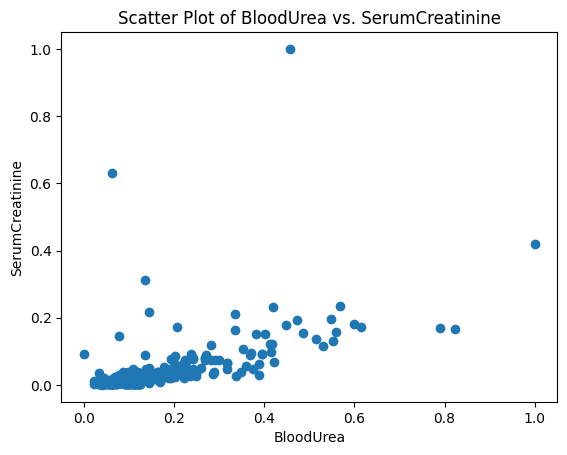

In [ ]:
scatter(df.SpecificGravity, df.Hemoglobin)
scatter(df.Sugar, df.BloodGlucose)
scatter(df.DiabetesMellitus, df.BloodGlucose)
scatter(df.BloodUrea, df.SerumCreatinine)

In [ ]:
import plotly.express as px
from sklearn.metrics import silhouette_score as ss

def getDBSCAN(xLabel, yLabel, epsi):
  data = df[[f"{xLabel.name}", f"{yLabel.name}"]]
  X = data.to_numpy()
  X.shape

  dbscan_cluster_model = DBSCAN(eps=epsi, min_samples=5).fit(X)
  df['cluster'] = dbscan_cluster_model.labels_
  fig = px.scatter(x=xLabel, y=yLabel, color=df['cluster'])
  fig.update_layout(title=f"Scatter Plot DBSCAN of {xLabel.name} vs. {yLabel.name}", xaxis_title=xLabel.name, yaxis_title=yLabel.name)
  fig.show()
  print(f"Total Cluster:\n{df['cluster'].value_counts()}")

  silhouette = ss(X, df['cluster'])
  print(f"Persentase Silhouette: {silhouette}")

In [ ]:
getDBSCAN(df.SpecificGravity, df.Hemoglobin, 0.1)
getDBSCAN(df.Sugar, df.BloodGlucose, 0.1)
getDBSCAN(df.DiabetesMellitus, df.BloodGlucose, 0.1)
getDBSCAN(df.BloodUrea, df.SerumCreatinine, 0.1)

Total Cluster:
 0    105
 1     82
 4     80
 2     74
 3     42
-1      7
 5      5
 6      5
Name: cluster, dtype: int64
Persentase Silhouette: 0.32218664268534186


Total Cluster:
 0    333
-1     21
 2     15
 1     12
 3     10
 4      9
Name: cluster, dtype: int64
Persentase Silhouette: 0.5553738720574424


Total Cluster:
 1    259
 0    137
-1      4
Name: cluster, dtype: int64
Persentase Silhouette: 0.7858093615826995


Total Cluster:
 0    394
-1      6
Name: cluster, dtype: int64
Persentase Silhouette: 0.8157700103591911


In [ ]:
getDBSCAN(df.SpecificGravity, df.Hemoglobin, 0.2)
getDBSCAN(df.Sugar, df.BloodGlucose, 0.2)
getDBSCAN(df.DiabetesMellitus, df.BloodGlucose, 0.2)
getDBSCAN(df.BloodUrea, df.SerumCreatinine, 0.2)

Total Cluster:
 0    228
 1     84
 3     80
 2      7
-1      1
Name: cluster, dtype: int64
Persentase Silhouette: 0.35847038640782974


Total Cluster:
 0    381
 1     12
-1      7
Name: cluster, dtype: int64
Persentase Silhouette: 0.7195424989648695


Total Cluster:
 1    260
 0    137
-1      3
Name: cluster, dtype: int64
Persentase Silhouette: 0.7965346522433944


Total Cluster:
 0    396
-1      4
Name: cluster, dtype: int64
Persentase Silhouette: 0.8381752815086326
